In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from scipy import signal

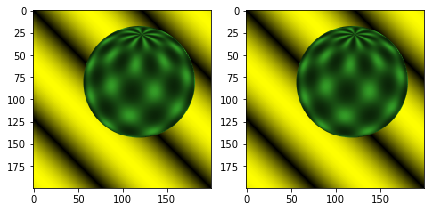

In [8]:
image1 = mpimg.imread('sphere0.png')
image1 = rgb2gray(image1)
image2 = mpimg.imread('sphere1.png')
image2 = rgb2gray(image2)

fig = plt.figure(figsize = (7,7))
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(image2, cmap = 'gray')

In [138]:
# Calculating gradient along x direction
def xGradient(img1, img2):
    xFilter = np.array([[0, 0, 0],
                        [-1, 0, 1],
                        [0, 0, 0]])
    xFilterImage1 = signal.convolve2d(img1, xFilter, mode = 'same')
    xFilterImage2 = signal.convolve2d(img2, xFilter, mode = 'same')
    Ix = xFilterImage1 + xFilterImage2
    #plt.imshow(Ix, cmap = 'gray')
    return Ix

In [171]:
# Calculating grdient along y direction
def yGradient(img1, img2):
    yFilter = np.array([[0, 1, 0],
                        [0, 0, 0],
                        [0, -1, 0]])
    yFilterImage1 = signal.convolve2d(img1, yFilter, mode = 'same')
    yFilterImage2 = signal.convolve2d(img2, yFilter, mode = 'same')
    Iy = yFilterImage1 + yFilterImage2
    #plt.imshow(Iy, cmap = 'gray')
    return Iy

In [172]:
# Calculting temporal partial derivative
def temporalDerivative(img1, img2):
    It = np.subtract(image2, image1)
    #plt.imshow(It, cmap = 'gray')
    return It

In [173]:
def lucasKanade(n, image):
    u = np.zeros(image.shape)
    v = np.zeros(image.shape)
    offset = int((n - 1) / 2)
    for i in range(0, u.shape[0]):
        for j in range(0, u.shape[1]):
            IxPoint = Ix[i - offset : i + offset, j - offset : j + offset].flatten()
            IyPoint = Iy[i - offset : i + offset, j - offset : j + offset].flatten()
            FtPoint = It[i - offset : i + offset, j - offset : j + offset].flatten()
            A = np.vstack((IxPoint, IyPoint)).T
            x = np.matmul(np.matmul(np.linalg.pinv(np.matmul(A.T, A)), A.T), FtPoint)    
            
            u[i, j] = x[0]
            v[i, j] = x[1]
            
    fig1 = plt.figure(figsize = (7,7))
    plt.subplot(1, 2, 1)
    plt.title('Vector u')
    plt.imshow(u, cmap = 'gray')
    plt.subplot(1, 2, 2)
    plt.title('Vector v')
    plt.imshow(v, cmap = 'gray')
    
    return u, v

In [174]:
def plotVectors(u, v, image):
    subsample = 6
    rows = u.shape[0]
    cols = u.shape[1]
    subU = u[0 : rows : subsample, 0 : cols : subsample]
    subV = v[0 : rows : subsample, 0 : cols : subsample]

    xc = np.linspace(0, cols, subU.shape[1])
    yc = np.linspace(0, rows, subV.shape[0])

    xv, yv = np.meshgrid(xc, yc)

    fig1 = plt.figure(figsize = (7, 7))
    plt.imshow(image, cmap = 'gray')
    plt.title('Optical Flow'), plt.xticks([]), plt.yticks([])
    plt.quiver(xv, yv, subU, subV, color = 'r')

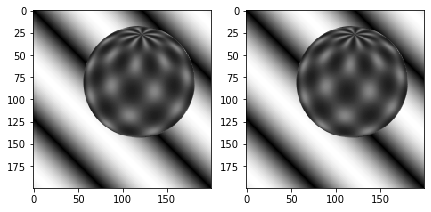

In [175]:
image1 = mpimg.imread('sphere0.png')
image1 = rgb2gray(image1)
image2 = mpimg.imread('sphere1.png')
image2 = rgb2gray(image2)

fig = plt.figure(figsize = (7,7))
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(image2, cmap = 'gray')

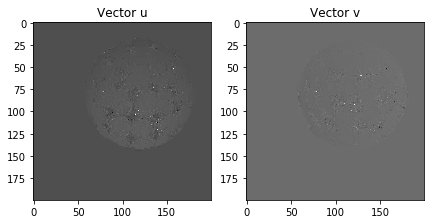

In [176]:
# For a neighbourhood size of 3
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(3, image1)

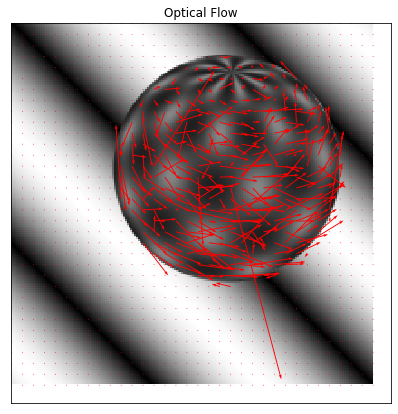

In [177]:
# For neighbourhood of size 3
plotVectors(u, v, image1)

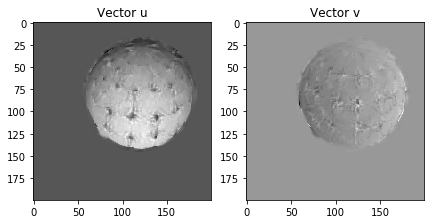

In [178]:
# For a neighbourhood size of 5
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(5, image1)

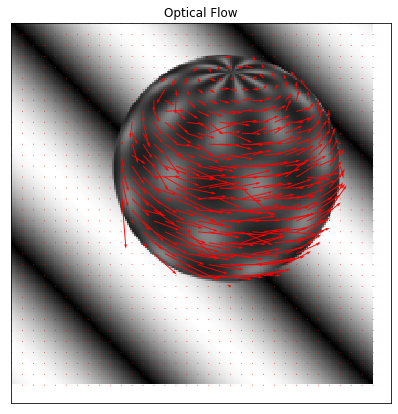

In [179]:
#For neighbourhood of size 5
plotVectors(u, v, image1)

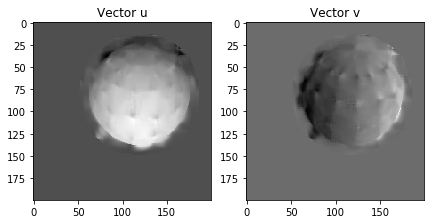

In [180]:
# For a neighbourhood size of 11
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(11, image1)

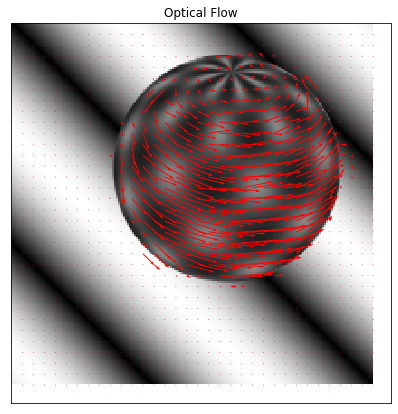

In [181]:
#For neighbourhood of size 11
plotVectors(u, v, image1)

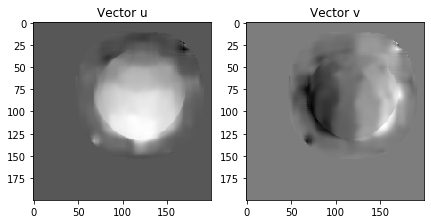

In [182]:
# For a neighbourhood size of 21
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(21, image1)

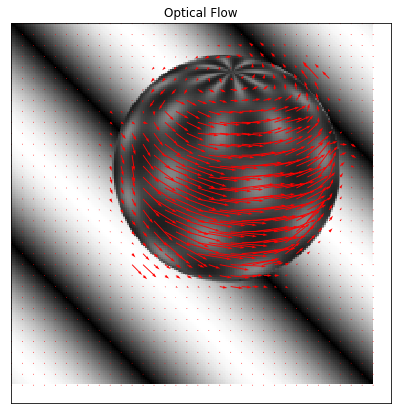

In [183]:
#For neighbourhood of size 21
plotVectors(u, v, image1)

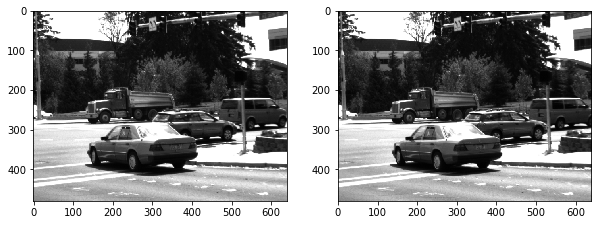

In [119]:
image1 = mpimg.imread('traffic0.png')
image1 = rgb2gray(image1)
image2 = mpimg.imread('traffic1.png')
image2 = rgb2gray(image2)

fig = plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(image2, cmap = 'gray')

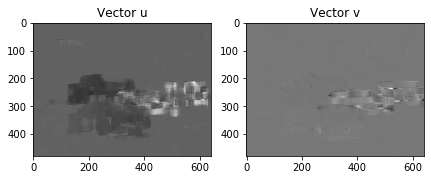

In [135]:
# For a neighbourhood size of 21
Ix = xGradient(image1, image2)
Iy = yGradient(image1, image2)
It = temporalDerivative(image1, image2)
u, v = lucasKanade(21, image1)

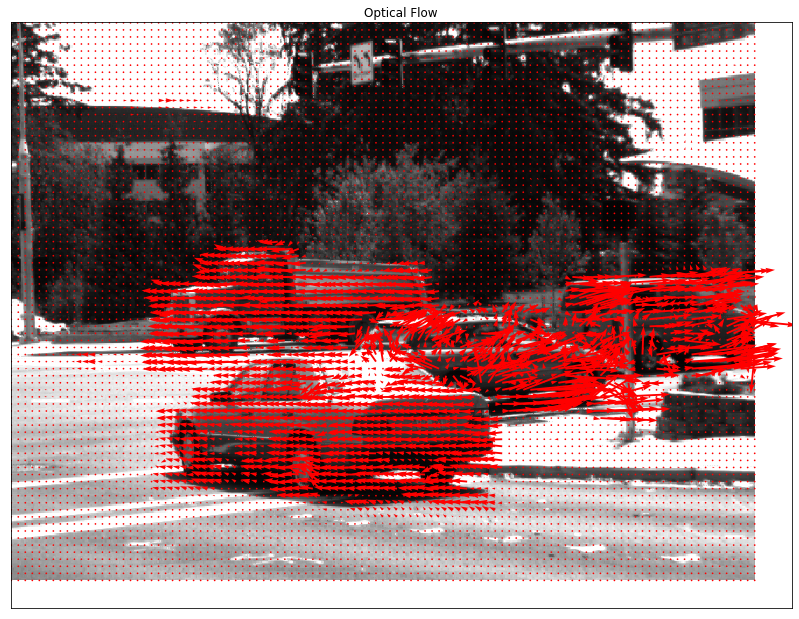

In [136]:
plotVectors(u, v, image1)